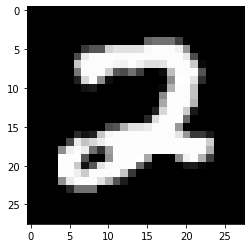

The result of image given in train data set is 2


In [1]:
#Modoule 13.10 code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("mnist_train.csv")  # consists of row as data point (pixel value of 28*28 dimensions)

labels = data['label']      # 1st column as digit label as 0,1,2....9

data = data.drop('label',axis = 1)  # drop the y or label values

index = np.random.randint(0,784)
pixel_matrix = data.iloc[index].to_numpy().reshape(28,28)
plt.imshow(pixel_matrix,cmap="gray")
plt.show()

print("The result of image given in train data set is",labels[index])

In [65]:
# data = data.head(15000)
# labels = labels.head(15000)
# labels.shape

(15000,)

In [110]:
from sklearn.preprocessing import StandardScaler

standardized_data = StandardScaler().fit_transform(data)  # column standardization

standardized_data.shape

(42000, 784)

In [112]:
sample_data = standardized_data
cov_matrix = np.matmul(sample_data.T, sample_data)
cov_matrix = cov_matrix / len(standardized_data)
cov_matrix .shape

(784, 784)

In [113]:
from scipy.linalg import eigh

eigen_values, eigen_vectors = eigh(cov_matrix,eigvals=(782,783))
eigen_vectors

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [114]:
resultant = np.matmul(eigen_vectors.T, sample_data.T)
resultant = resultant.T
print(resultant.shape)
print(labels.shape)

(42000, 2)
(42000,)


In [115]:
new_resultant = np.column_stack((resultant,labels))
dataframe = pd.DataFrame(data = new_resultant,columns = ("Feature 1","Feature 2","labels"))

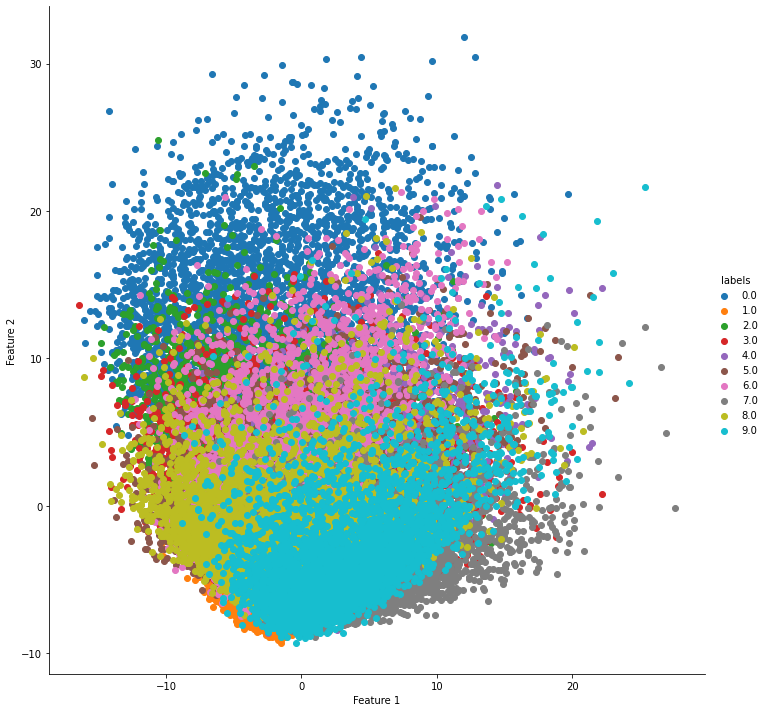

In [120]:
import seaborn as sns
sns.FacetGrid(dataframe,hue="labels",height=10) \
.map(plt.scatter,"Feature 1","Feature 2") \
.add_legend()
plt.show()

In [124]:
from sklearn import decomposition

pca = decomposition.PCA()

In [140]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data = np.column_stack((pca_data,labels))
pca_data.shape

(42000, 3)

In [141]:
dataframe1 = pd.DataFrame(data = pca_data,columns = ("Feature 1","Feature 2","labels"))

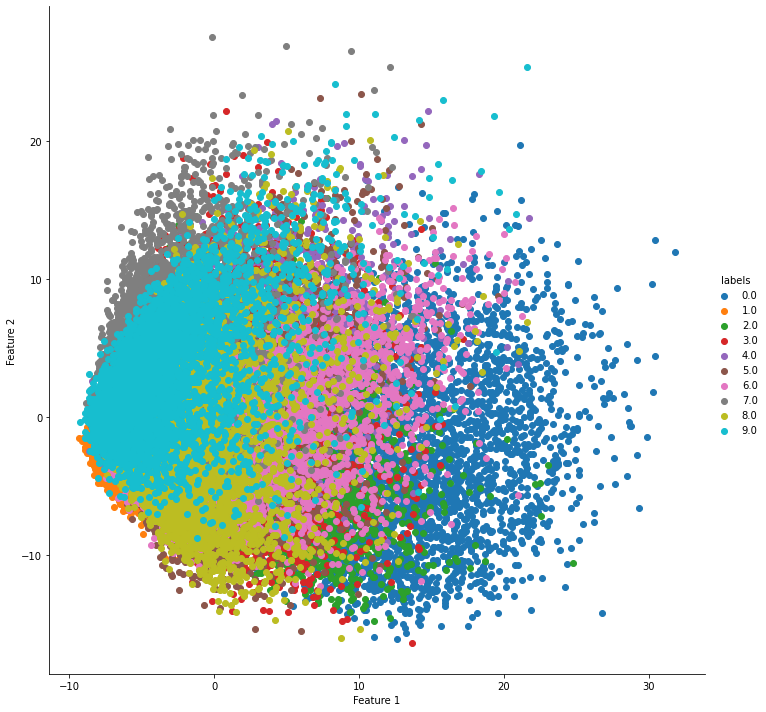

In [142]:
sns.FacetGrid(dataframe,hue="labels",height=10) \
.map(plt.scatter,"Feature 1","Feature 2") \
.add_legend()
plt.show()